# Figure 4: Dynamics of run duration and running speed across action costs.

## setup and imports

In [29]:
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import glob

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [30]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [31]:
rat_markers = {}
sequence = {}

# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54']

m, f = 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in animalList if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in animalList if 'F' in x]), start_intensity=80)

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'o', '-']
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 'o', '-']
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")
   
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43
Loading data for RatM53
Loading data for RatM54


# Figure 4A Schematics of three action cost conditions with increasing platform distances.

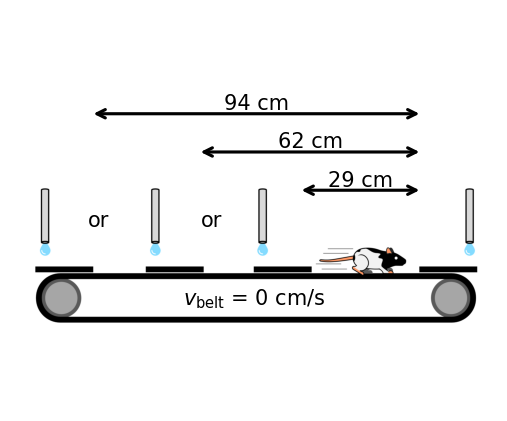

In [32]:
def Figure4A(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "Figures/4Arun.png"

    img = plt.imread(path)
    img = img[300:2600, 150:3075]

    # add 300 above the image so same size as the other image
    img = np.concatenate((np.ones((300, img.shape[1], 3), dtype=np.uint8), img), axis=0)
    ax.imshow(img)
    ax.axis("off")
    ax.text(s=r'$v_{\mathrm{belt}}$ = 0 cm/s', x=img.shape[1]/2, y=1760, ha="center", va="center", fontsize=5)
    ax.text(s='or', x=450, y=1250, ha="center", va="center", fontsize=5)
    ax.text(s='or', x=1185, y=1250, ha="center", va="center", fontsize=5)

    ax.annotate(text='', xy=(1720, 1050), xytext=(2600, 1050), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='', xy=(1060, 800), xytext=(2600, 800), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='', xy=(360, 550), xytext=(2600, 550), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    
    ax.annotate(text='29 cm', xy=(0, 0), xytext=((1720+2600)/2, 1050), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)
    ax.annotate(text='62 cm', xy=(0, 0), xytext=((1060+2600)/2, 800), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)
    ax.annotate(text='94 cm', xy=(0, 0), xytext=((360+2600)/2, 550), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure4A(ax=ax)

# 3B Effect of distance on μ0, μt and μu

$\mu_0$: p_s=0.000, p_i=0.000, obs_slope=0.266, obs_intercept=0.864
$\mu_t$: p_s=0.112, p_i=0.000, obs_slope=0.009, obs_intercept=0.052
$\mu_u$: p_s=0.595, p_i=0.128, obs_slope=-0.004, obs_intercept=0.012


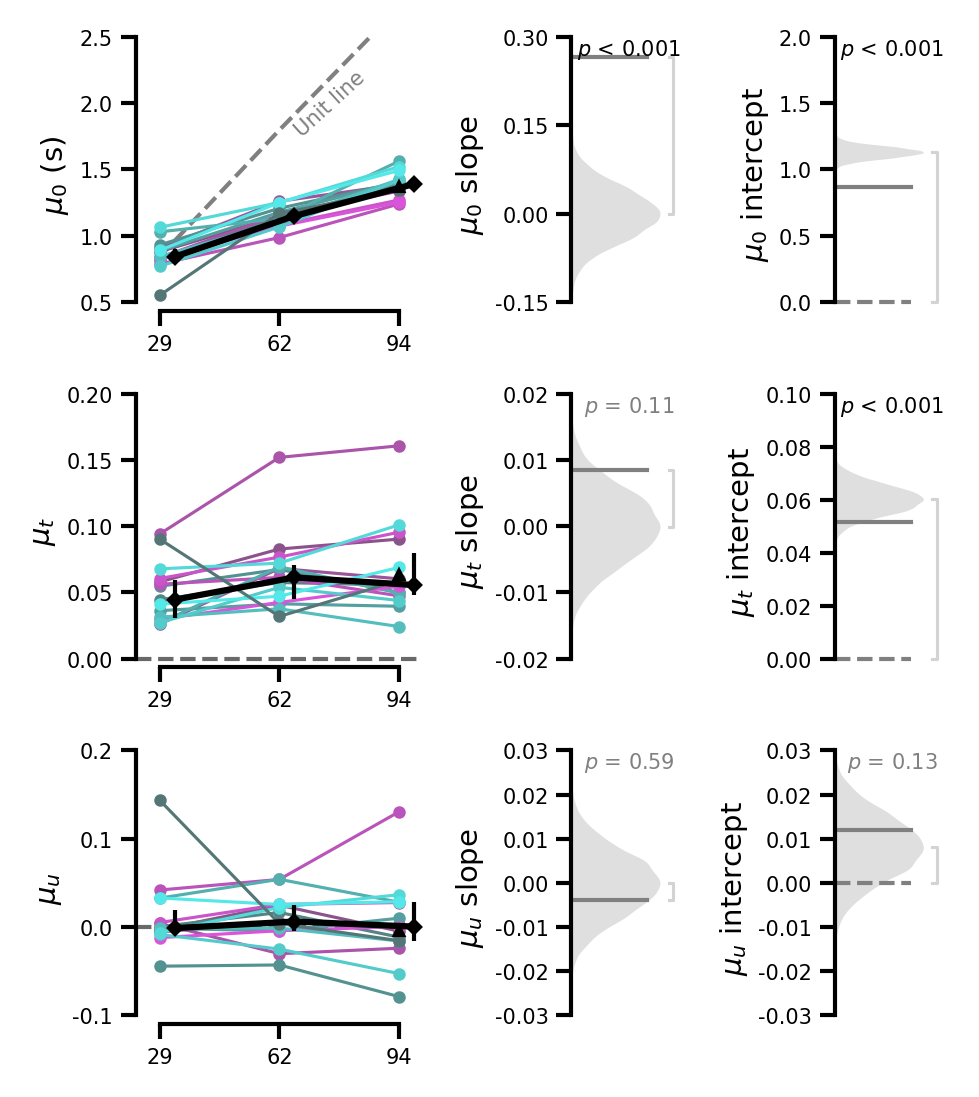

In [33]:
def Figure4B_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_0[animal]["60"], mu_0[animal]["90"], mu_0[animal]["120"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2], zorder=8 if animal=='RatM00' else 5)
    
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/crossing_time_fit_example_session.p", "rb"))
    ax.plot(2, ex_mu, color='black', marker='^', zorder=10, markersize=2, linewidth=0)
    
    
    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(0.5, 2.5)
    ax.set_yticks([.5, 1, 1.5, 2, 2.5])
    ax.set_ylabel(r'$\mu_0$' + ' (s)')
    
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_0, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

    avg60 = np.median([mu_0[animal]["60"] for animal in animalList])
    x, y = [0, 1, 2], [avg60, (62/29)*avg60, (94/29)*avg60]
    ax.plot(x, y, color='gray', linestyle='--', linewidth=1, alpha=1, zorder=0,)

    p, cov = curve_fit(lambda x, *p: np.polyval(p, x), x, y, p0=[0, 0])  # overkill, text should now be parallel to the line
    ax.text(s='Unit line', x=1.1, y=2, ha="left", va="center", fontsize=5, color='gray', rotation= 45*p[0])

def Figure4B_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_t[animal]["60"], mu_t[animal]["90"], mu_t[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2], zorder=8 if animal=='RatM00' else 5)
        
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/crossing_time_fit_example_session.p", "rb"))
    ax.plot(2, ex_mu_t, color='black', marker='^', zorder=10, markersize=2, linewidth=0)
    
    
    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-0.0, .2)
    ax.set_yticks([0, 0.05, .10, .15, .2])
    ax.set_ylabel(r'$\mu_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_t, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def Figure4B_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, mu_u, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_u[animal]["60"], mu_u[animal]["90"], mu_u[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2], zorder=8 if animal=='RatM00' else 5)
        
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/crossing_time_fit_example_session.p", "rb"))
    ax.plot(2, ex_mu_u, color='black', marker='^', zorder=10, markersize=2, linewidth=0)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-.1, .2)
    ax.set_yticks([-.1, 0.0, .1, .2])
    ax.set_ylabel(r'$\mu_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_u, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')


def Figure4B_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(mu_0, dist_or_tm='dist', varname=r'$\mu_0$', 
                        ax_slope=ax_slope, yticks_slope=[-0.15, 0, 0.15, 0.3], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .5, 1, 1.5, 2])

def Figure4B_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(mu_t, dist_or_tm='dist', varname=r'$\mu_t$', 
                        ax_slope=ax_slope, yticks_slope=[-.02, -.01, 0, .01, .02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .02, .04, .06, .08, .1])

def Figure4B_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, mu_u, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(mu_u, dist_or_tm='dist', varname=r'$\mu_u$',
                        ax_slope=ax_slope, yticks_slope=[-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03])


fig, axs = plt.subplots(3, 3, figsize=(cm2inch(8), cm2inch(9)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
Figure4B_zero(axs[0, 0])
Figure4B_t(axs[1, 0])
Figure4B_u(axs[2, 0])


Figure4B_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
Figure4B_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
Figure4B_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])


# 2I mean run speed Distance

Run speed: p_s=0.000, p_i=0.000, obs_slope=16.543, obs_intercept=37.436


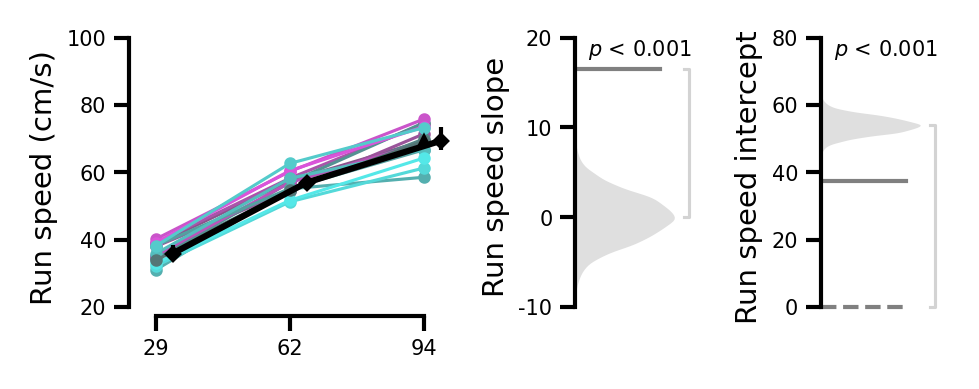

In [34]:
def Figure4C(root, ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["60", "90", "120"]
    run_speeds = {k: {a: [] for a in conds} for k in animalList}
    run_speeds2 = {k: {a: [] for a in conds} for k in animalList}

    for cond, sessionlist in zip(conds, [dist60, dist90, dist120]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if get_block(sequence[animal, session][elem][0]) <= 1:
                        if sequence[animal, session][elem][1] == 'run':
                            tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                            run_speeds[animal][cond].append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    for animal in animalList:
        for cond in conds:
            run_speeds2[animal][cond] = np.median(run_speeds[animal][cond])

    for animal in animalList:
        ax.plot([0, 1, 2], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2, 
                label=f'Individuals (n={len(animalList)})', lw=.75, zorder=8 if animal=='RatM00' else 5)

    animal='RatM00'
    session='RatM00_2021_07_22_16_13_03'
    example_session_run_speeds = []
    params = get_from_pickle(root, animal, session, name="params.p")
    for elem in sequence[animal, session]:
        if get_block(sequence[animal, session][elem][0]) <= 1:
            if sequence[animal, session][elem][1] == 'run':
                tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                example_session_run_speeds.append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    ax.plot(2, np.median(example_session_run_speeds), color='black', marker='^', zorder=10, markersize=2, linewidth=0, label='Example session')
    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")
    ax.set_ylim(20, 100)
    ax.set_yticks([20, 40, 60, 80, 100, ])
    ax.set_ylabel("Run speed (cm/s)")

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(run_speeds2, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')
    return run_speeds2

def Figure4C_stats(var, ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    regression_permutation(var, dist_or_tm='dist', varname='Run speed',
                        ax_slope=ax_slope, yticks_slope=[-10, 0, 10, 20],
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, 20, 40, 60, 80])

fig, axs = plt.subplots(1, 3, figsize=(cm2inch(8), cm2inch(3)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
run_speeds = Figure4C(root, ax=axs[0])
Figure4C_stats(run_speeds, ax_slope=axs[1], ax_intercept=axs[2])

# Figure 4D Same with treadmill velocity.

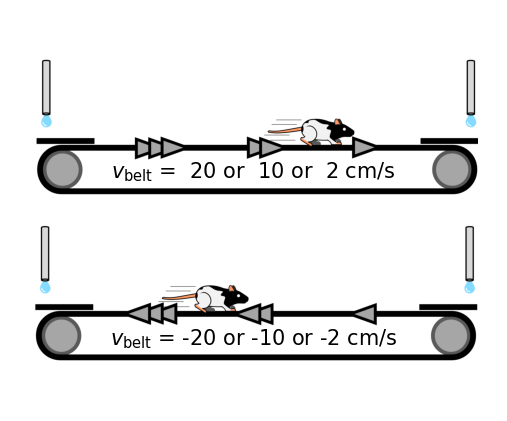

In [35]:
def Figure4D(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "Figures/4Drun.png"

    img = plt.imread(path)
    img = img[:, 150:3075]
    ax.imshow(img)
    ax.axis("off")
    ax.text(s=r'$v_{\mathrm{belt}}$ =  20 or  10 or  2 cm/s', x=img.shape[1]/2, y=930, ha="center", va="center", fontsize=5)
    ax.text(s=r'$v_{\mathrm{belt}}$ = -20 or -10 or -2 cm/s', x=img.shape[1]/2, y=2020, ha="center", va="center", fontsize=5)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure4D(ax=ax)

# 3E Effect of treadmill on μ0, μt and μu

In [36]:
# compute travelled distance for each run (pos start - pos end) for each experimental condition

_conds = ["60", "90", "120", "TM20", "TM10", "TM2", "TMrev10", "TMrev20"]
medianrealdistTM = {cond: 0 for cond in _conds}

TM1_pfPOS = [16.1, 97.3]
for sessions, cond in zip([dist60, dist90, dist120, TM20, TM10, TM2+TMrev2, TMrev10, TMrev20], _conds):
    realdist = {animal: [] for animal in animalList}
    for animal in animalList:
        for session in sorted(matchsession(animal, sessions)):
            XtrackRunToRightBin, XtrackRunToLeftBin = get_from_pickle(root, animal, session, name="trackPos.p")
            tm_speed = get_from_pickle(root, animal, session, name="params.p")['treadmillSpeed'][0]
            for i in range(0, 12):
                tempRight, tempLeft = [], []
                for r in XtrackRunToRightBin[i]:
                    # count number of elems between 16.1 and 97.3
                    n = len([x for x in r if TM1_pfPOS[0] < x < TM1_pfPOS[1]])
                    tempRight.append(abs(r[0] - r[-1]) - (tm_speed * 0.04 * n))
                for l in XtrackRunToLeftBin[i]:
                    n = len([x for x in l if TM1_pfPOS[0] < x < TM1_pfPOS[1]])
                    tempLeft.append(abs(l[0] - l[-1]) - (tm_speed * 0.04 * n))
                realdist[animal] = np.append(realdist[animal], tempRight)
                realdist[animal] = np.append(realdist[animal], tempLeft)
    medianrealdistTM[cond] = np.median([np.median(realdist[animal]) for animal in animalList])
print(medianrealdistTM)


{'60': 30.25484332468933, '90': 62.57280197042169, '120': 94.81496985931918, 'TM20': 76.52522259388564, 'TM10': 85.09616448786748, 'TM2': 95.53353230421249, 'TMrev10': 107.01234316983565, 'TMrev20': 117.93666695056669}


$\mu_0$: p_s=0.000, p_i=0.000, obs_slope=0.056, obs_intercept=1.306
$\mu_t$: p_s=0.051, p_i=0.000, obs_slope=0.004, obs_intercept=0.057
$\mu_u$: p_s=0.426, p_i=0.745, obs_slope=-0.002, obs_intercept=0.001


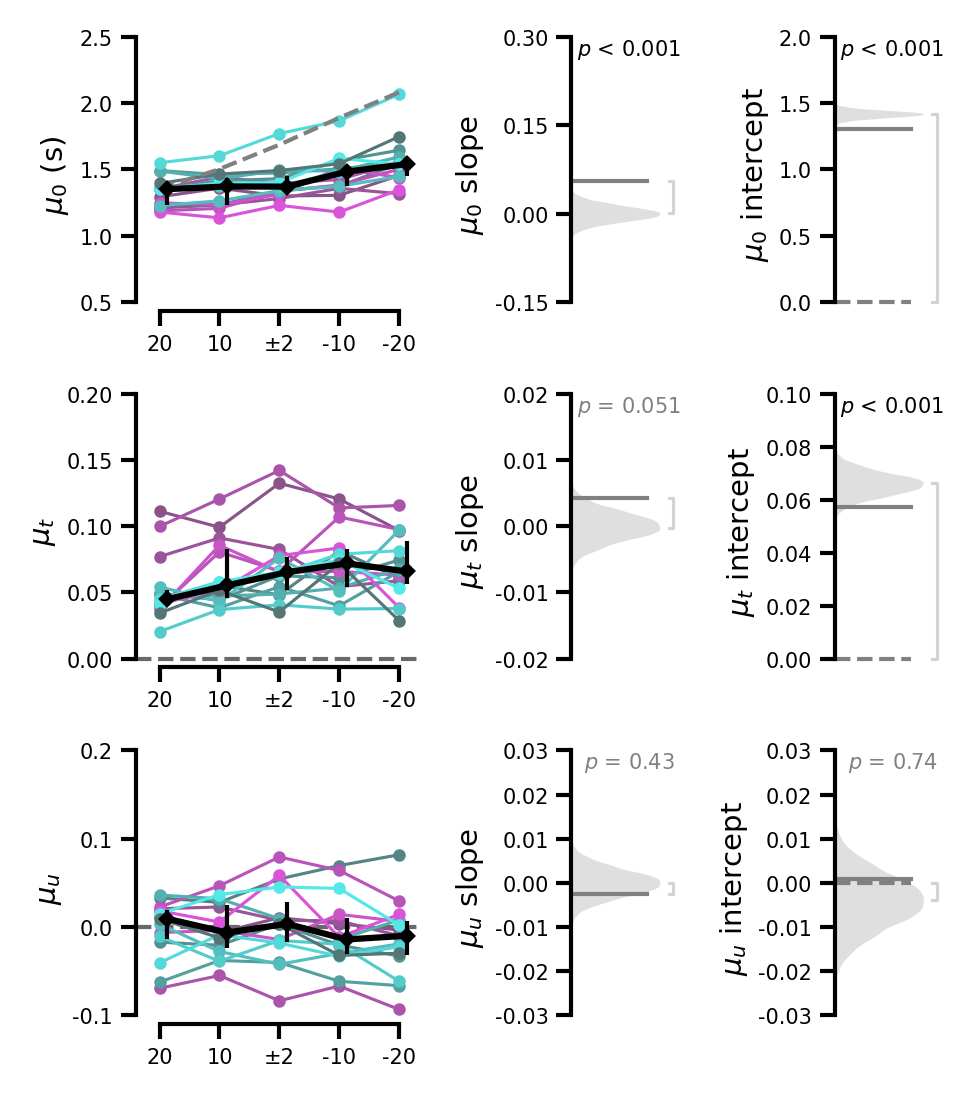

In [37]:
def Figure4E_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_0[animal]["20"], mu_0[animal]["10"], mu_0[animal]["2"], mu_0[animal]["rev10"], mu_0[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2], zorder=8 if animal=='RatM00' else 5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(0.5, 2.5)
    ax.set_yticks([.5, 1, 1.5, 2, 2.5])
    ax.set_ylabel(r'$\mu_0$' + ' (s)')
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_0, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

    avg20 = np.median([mu_0[animal]["20"] for animal in animalList])
    ax.plot([0, 1, 2, 3, 4], [(76.5/76.5)*avg20, (85.1/76.5)*avg20, (95.5/76.5)*avg20, 
                              (107/76.5)*avg20, (117.9/76.5)*avg20], 
                              color='gray', linestyle='--', linewidth=1, alpha=1, zorder=10)

def Figure4E_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_t[animal]["20"], mu_t[animal]["10"], mu_t[animal]["2"], mu_t[animal]["rev10"], mu_t[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2], zorder=8 if animal=='RatM00' else 5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(.0, .2)
    ax.set_yticks([0, 0.05, .1, .15, .2, ])
    ax.set_ylabel(r'$\mu_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_t, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def Figure4E_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, mu_u, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_u[animal]["20"], mu_u[animal]["10"], mu_u[animal]["2"], mu_u[animal]["rev10"], mu_u[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, linestyle=rat_markers[animal][2], zorder=8 if animal=='RatM00' else 5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-.1, .2)
    ax.set_yticks([-.1, 0.0, .1, .2])
    ax.set_ylabel(r'$\mu_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_u, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')



def Figure4E_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(mu_0, dist_or_tm='tm', varname=r'$\mu_0$', 
                        ax_slope=ax_slope, yticks_slope=[-0.15, 0, 0.15, 0.3], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .5, 1, 1.5, 2])

def Figure4E_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(mu_t, dist_or_tm='tm', varname=r'$\mu_t$', 
                        ax_slope=ax_slope, yticks_slope=[-.02, -.01, 0, .01, .02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .02, .04, .06, .08, .1])

def Figure4E_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, mu_u, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(mu_u, dist_or_tm='tm', varname=r'$\mu_u$',
                        ax_slope=ax_slope, yticks_slope=[-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03])

fig, axs = plt.subplots(3, 3, figsize=(cm2inch(8), cm2inch(9)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
Figure4E_zero(axs[0, 0])
Figure4E_t(axs[1, 0])
Figure4E_u(axs[2, 0])

Figure4E_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
Figure4E_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
Figure4E_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])

# 2F Running speed across action cost conditions

Run speed: p_s=0.000, p_i=0.000, obs_slope=7.420, obs_intercept=54.469


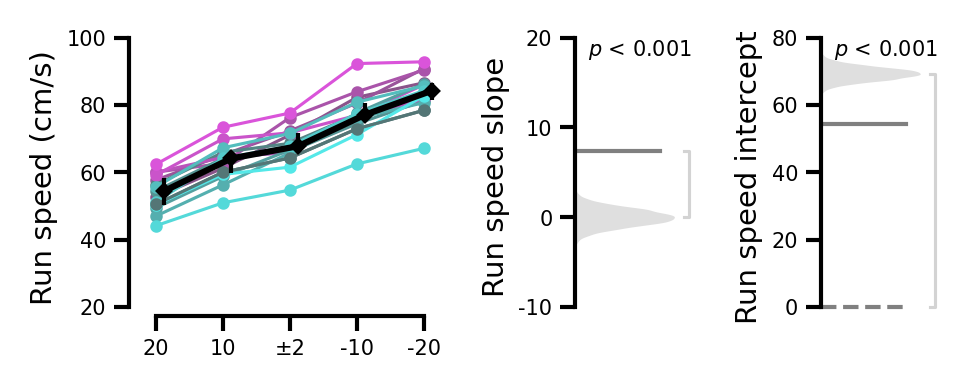

In [38]:
def Figure2F(root, ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["20", "10", "2", "rev10", "rev20"]
    run_speeds = {k: {a: [] for a in conds} for k in animalList}
    run_speeds2 = {k: {a: [] for a in conds} for k in animalList}

    for cond, sessionlist in zip(conds, [TM20, TM10, TM2, TMrev10, TMrev20]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if get_block(sequence[animal, session][elem][0]) <= 1:
                        if sequence[animal, session][elem][1] == 'run':
                            tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                            run_speeds[animal][cond].append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    for animal in animalList:
        for cond in conds:
            run_speeds2[animal][cond] = np.median(run_speeds[animal][cond])

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2, lw=.75, zorder=8)
        
        if animal == 'RatM00':
            pickle.dump([np.median(run_speeds[animal][cond]) for cond in conds], open("picklejar/example_rat_run_speeds_tm.p", "wb"))
            ax.plot([0, 1, 2, 3, 4], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2, zorder=10, lw=.75)
                
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(20, 100)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_ylabel("Run speed (cm/s)")

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(run_speeds2, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')
    return run_speeds2

def Figure2F_stats(var, ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    regression_permutation(var, dist_or_tm='tm', varname='Run speed',
                        ax_slope=ax_slope, yticks_slope=[-10, 0, 10, 20],
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, 20, 40, 60, 80])

fig, axs = plt.subplots(1, 3, figsize=(cm2inch(8), cm2inch(3)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
run_speeds = Figure2F(root, ax=axs[0])
Figure2F_stats(run_speeds, ax_slope=axs[1], ax_intercept=axs[2])

# Figure 4: Dynamics of run duration and running speed across action costs.

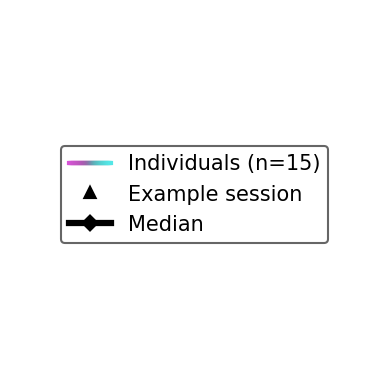

In [39]:

def dummy_legend(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    ex_session = ax.plot(2, 0, color='black', marker='^', zorder=10, markersize=2, linewidth=0, label='Example session')
    median = ax.plot([-100, -101], [-100, -101], color='k', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median', zorder=5)

    ax.axis('off')
    ax.set_xlim(10, 11)
    ax.set_ylim(10, 11)

    add_colored_intact(ax, handles=[ex_session, median],
                    labels=['Example session', 'Median'], text=f'Individuals (n={len(animalList)})', 
                    loc='center', bbox=(.5, .5))


fig, axs = plt.subplots(1, 1, figsize=(cm2inch(3), cm2inch(3)))
dummy_legend(ax=axs)

$\mu_0$: p_s=0.000, p_i=0.000, obs_slope=0.266, obs_intercept=0.864
$\mu_t$: p_s=0.112, p_i=0.000, obs_slope=0.009, obs_intercept=0.052
$\mu_u$: p_s=0.595, p_i=0.128, obs_slope=-0.004, obs_intercept=0.012
Run speed: p_s=0.000, p_i=0.000, obs_slope=16.543, obs_intercept=37.436
$\mu_0$: p_s=0.000, p_i=0.000, obs_slope=0.056, obs_intercept=1.306
$\mu_t$: p_s=0.051, p_i=0.000, obs_slope=0.004, obs_intercept=0.057
$\mu_u$: p_s=0.426, p_i=0.745, obs_slope=-0.002, obs_intercept=0.001
Run speed: p_s=0.000, p_i=0.000, obs_slope=7.420, obs_intercept=54.469


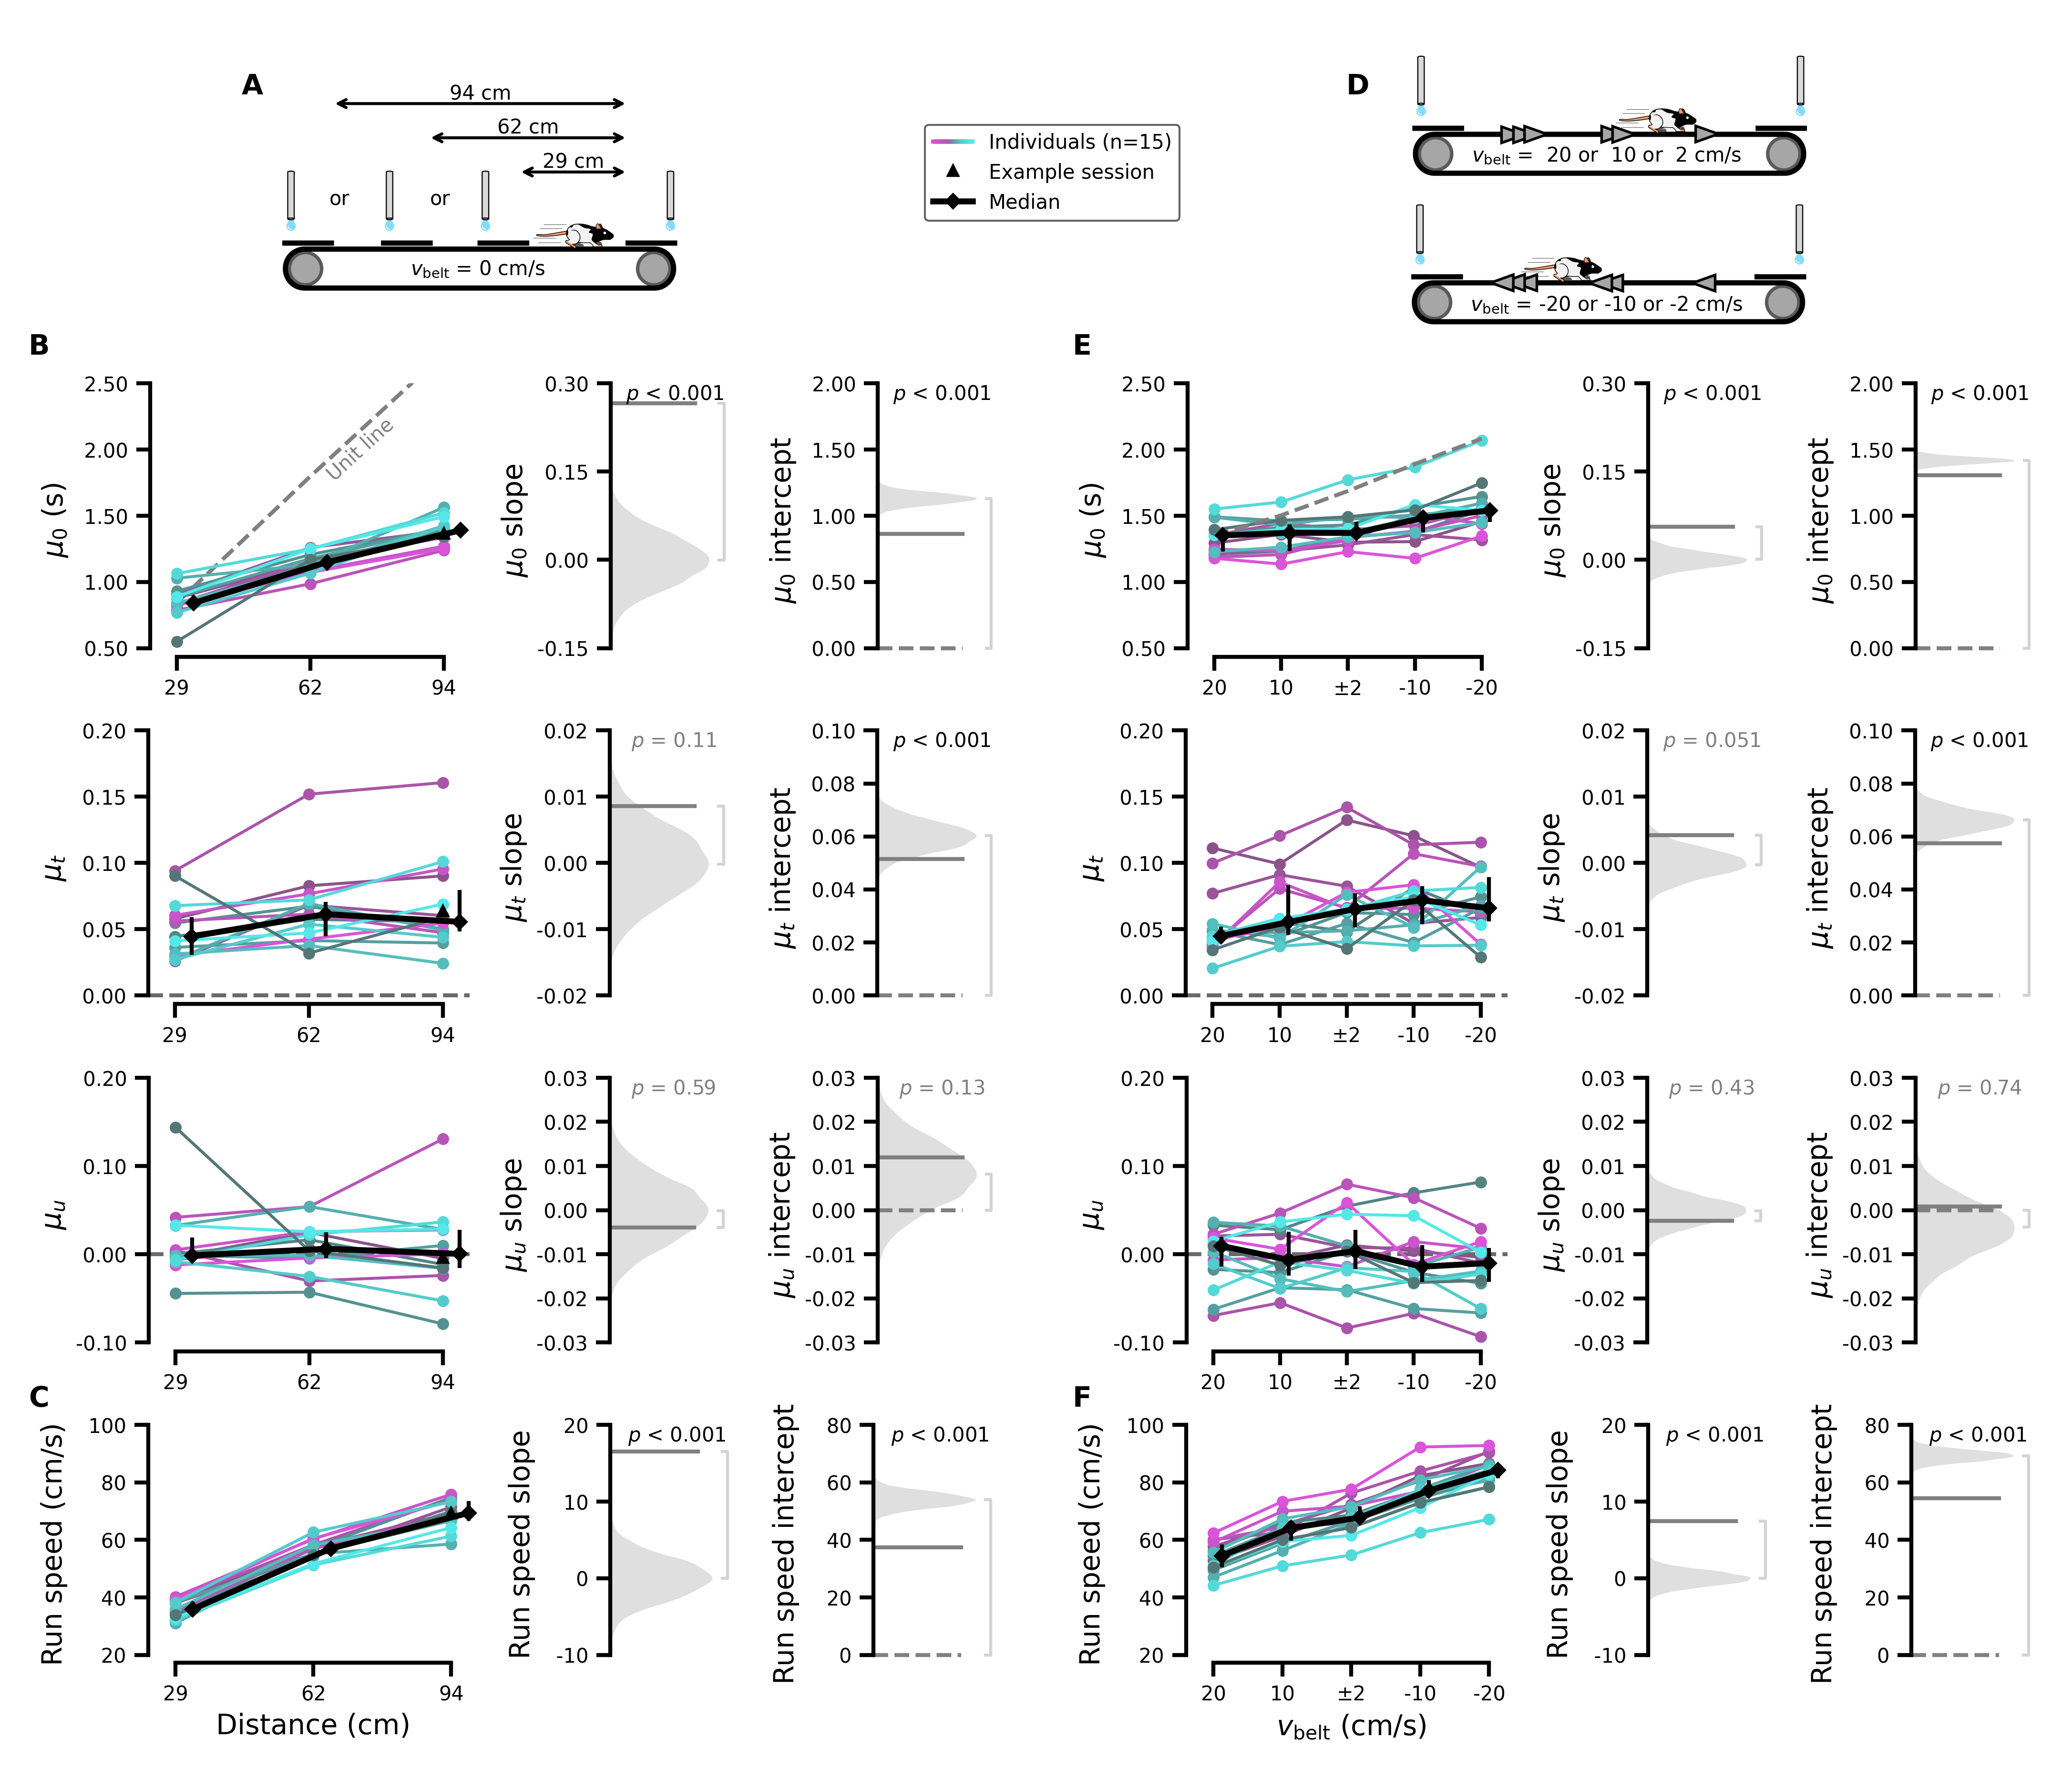

In [40]:
fig = plt.figure(figsize=(cm2inch(18), cm2inch(18.5)), constrained_layout=True, facecolor='w', dpi=600)

gs0 = fig.add_gridspec(6, 1, wspace=.5, hspace=.5, height_ratios=[1, 1, 1, 1, 1, 1])

row2 = gs0[0].subgridspec(1, 3, wspace=.5, hspace=.5, width_ratios=[1, .2, 1])
schematic_distances = plt.subplot(row2[0])
schematic_vbelts = plt.subplot(row2[2])

row3 = gs0[1].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_mu_0_distance = plt.subplot(row3[0])
fit_mu_0_distance_slope = plt.subplot(row3[1])
fit_mu_0_distance_intercept = plt.subplot(row3[2])
fit_mu_0_vbelt = plt.subplot(row3[4])
fit_mu_0_vbelt_slope = plt.subplot(row3[5])
fit_mu_0_vbelt_intercept = plt.subplot(row3[6])

row4 = gs0[2].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_mu_t_distance = plt.subplot(row4[0])
fit_mu_t_distance_slope = plt.subplot(row4[1])
fit_mu_t_distance_intercept = plt.subplot(row4[2])
fit_mu_t_vbelt = plt.subplot(row4[4])
fit_mu_t_vbelt_slope = plt.subplot(row4[5])
fit_mu_t_vbelt_intercept = plt.subplot(row4[6])

row5 = gs0[3].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_mu_u_distance = plt.subplot(row5[0])
fit_mu_u_distance_slope = plt.subplot(row5[1])
fit_mu_u_distance_intercept = plt.subplot(row5[2])
fit_mu_u_vbelt = plt.subplot(row5[4])
fit_mu_u_vbelt_slope = plt.subplot(row5[5])
fit_mu_u_vbelt_intercept = plt.subplot(row5[6])

row6 = gs0[4].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
speed_distance = plt.subplot(row6[0])
speed_distance_slope = plt.subplot(row6[1])
speed_distance_intercept = plt.subplot(row6[2])
speed_vbelt = plt.subplot(row6[4])
speed_vbelt_slope = plt.subplot(row6[5])
speed_vbelt_intercept = plt.subplot(row6[6])

Figure4A(ax=schematic_distances)
Figure4B_zero(ax=fit_mu_0_distance)
Figure4B_t(ax=fit_mu_t_distance)
Figure4B_u(ax=fit_mu_u_distance)
run_speeds_dist = Figure4C(root, ax=speed_distance, show_xlabel=True)

Figure4B_zero_stats(ax_slope=fit_mu_0_distance_slope, ax_intercept=fit_mu_0_distance_intercept)
Figure4B_t_stats(ax_slope=fit_mu_t_distance_slope, ax_intercept=fit_mu_t_distance_intercept)
Figure4B_u_stats(ax_slope=fit_mu_u_distance_slope, ax_intercept=fit_mu_u_distance_intercept)
Figure4C_stats(run_speeds_dist, ax_slope=speed_distance_slope, ax_intercept=speed_distance_intercept)

Figure4D(ax=schematic_vbelts)
Figure4E_zero(ax=fit_mu_0_vbelt)
Figure4E_t(ax=fit_mu_t_vbelt)
Figure4E_u(ax=fit_mu_u_vbelt)
run_speeds_tm = Figure2F(root, ax=speed_vbelt, show_xlabel=True)

Figure4E_zero_stats(ax_slope=fit_mu_0_vbelt_slope, ax_intercept=fit_mu_0_vbelt_intercept)
Figure4E_t_stats(ax_slope=fit_mu_t_vbelt_slope, ax_intercept=fit_mu_t_vbelt_intercept)
Figure4E_u_stats(ax_slope=fit_mu_u_vbelt_slope, ax_intercept=fit_mu_u_vbelt_intercept)
Figure2F_stats(run_speeds_tm, ax_slope=speed_vbelt_slope, ax_intercept=speed_vbelt_intercept)

axes = fig.get_axes()
for ax in axes[:-6]:
    ax.yaxis.set_major_formatter('{x:>5.2f}')
for ax in axes[-6:]:
    ax.yaxis.set_major_formatter('{x:>5.0f}')

# letter labels
figuresLabels={"A":[0.105, .96], "D":[0.65, .96], 
               "B":[0.0, .835], "E":[0.515, .835],
               "C":[0.0, .33], "F":[0.515, .33],
               }

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1],
             label, figure=fig, 
             weight='bold', fontsize=7, ha='left', va='bottom')


legend = fig.add_axes([.5, .92, .01, .01])
dummy_legend(ax=legend)


plt.savefig("./Figures_paper/Figure_4.pdf", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_4.svg", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="svg", dpi=600)